## **Conditional Probabilities**
- We want to get the Probabilities of Reasons for absence given other categorical features and the same thing on the other side Getting the Probabilities of those features give the reasons for absence.
    1. P(Reasons for absence|Socail smoker)
    2. P(Reasons for absence|Socail drinker)
    3. P(Reasons for absence|Season)
    4. P(Extreme duration|High school grade)

- Importing the necessary Packages.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_palette('tab10')

- Loading the preprocessed version of the data (the Preprocessing phase is in visual analysis notebook)

In [10]:
preprocessed_data = pd.read_csv('preprocessed_data.csv')
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


- As we can observe from the previous plot, the highest reason for absence for 
drinkers is dental consultations (28), followed by medical consultations (23). 
Smokers' absences, however, are mostly due to unknown reasons (0) and 
laboratory examinations (25).

P(social drinker) = 0.568 | P(social smoker) = 0.073


<Figure size 640x480 with 0 Axes>

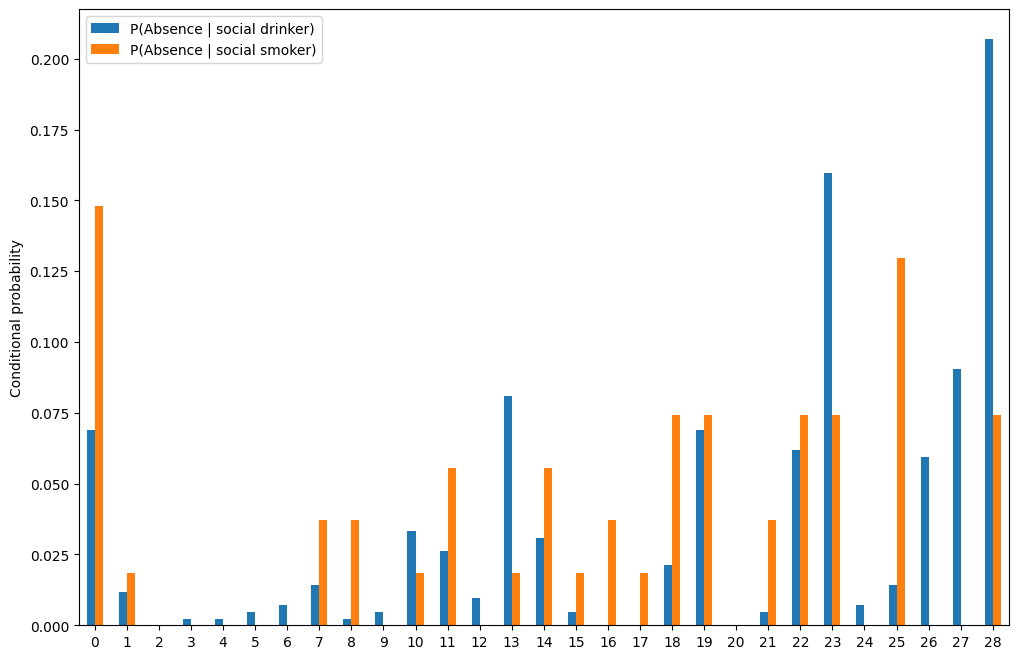

In [11]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"].value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"].value_counts(normalize=True)["Yes"]

print(f"P(social drinker) = {drinker_prob:.3f} \
| P(social smoker) = {smoker_prob:.3f}")

#create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts() / total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"][smoker_mask].value_counts() / total_entries

# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob / drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob / smoker_prob

# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(12,8), rot=0)
ax.set_ylabel("Conditional probability")
plt.savefig('figs/conditional_probabilities_reasons_given_drinker_smoker.png', \
            format='png', dpi=300)

#### We will use the Bayesian theorem to compute the conditional probability of being a social drinker or smoker, conditioned on the reason for absence. In other words (where Ri is the reason for which an employee is absent), we want to compute the probabilities of an employee being a social drinker **P(social drinker |Ri)**, or smoker **P(social smoker |Ri)**, as follows:
- As We can see from the resulting plot, the conditional probabilities of being a social drinker/smoker are quite high, once an absence with a certain reason occurs. This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data).

<Figure size 640x480 with 0 Axes>

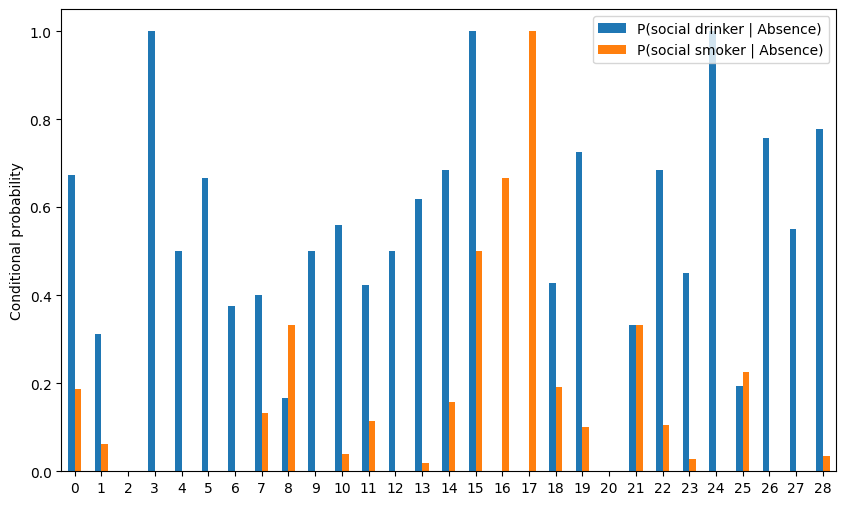

In [12]:
# compute reason for absence probabilities
absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize=True)

# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob


plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6), rot=0)
ax.set_ylabel("Conditional probability")
plt.savefig('figs/conditional_probabilities_drinker_smoker_given_each_reason.png', \
            format='png', dpi=300)

- We needed to define a function to create the conditional probabilities for every reason given each type of feature.

In [13]:
def condtional_probability(col):
    col_prob = preprocessed_data[col].value_counts(normalize=True)
    for case in preprocessed_data[col].unique():
        case_prob = col_prob[case]
        n = len(preprocessed_data)
        
        mask = preprocessed_data[col] == case
        
        prob_cas_and_r = preprocessed_data['Reason for absence'][mask].value_counts() / n
        r_given_case = prob_cas_and_r / case_prob

        cond_prob = pd.DataFrame()
        cond_prob[case] = r_given_case.sort_index()
        cond_prob.plot.bar(figsize=(12, 6), rot=0)
        plt.legend()
        plt.savefig(f'figs/conditional_prob_Reason_given_{case}_{col}.png', format='png')

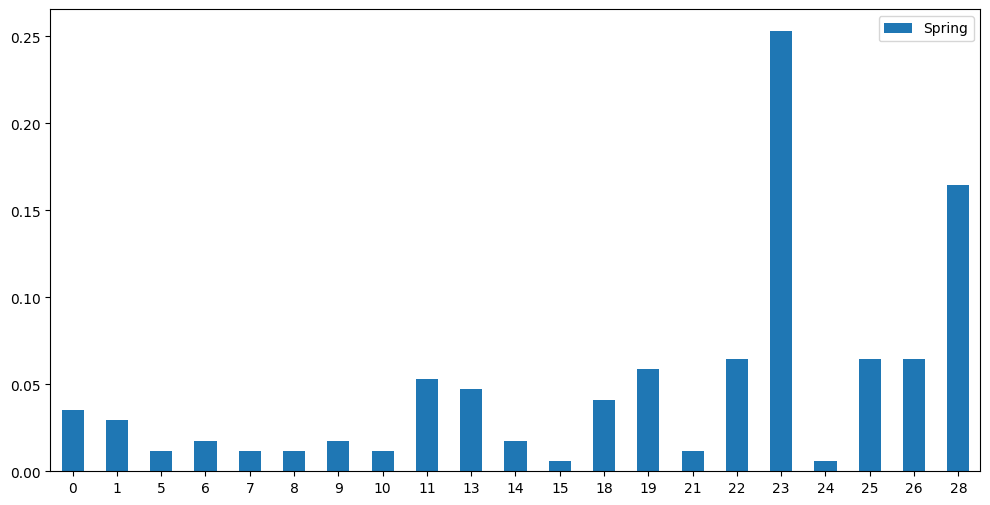

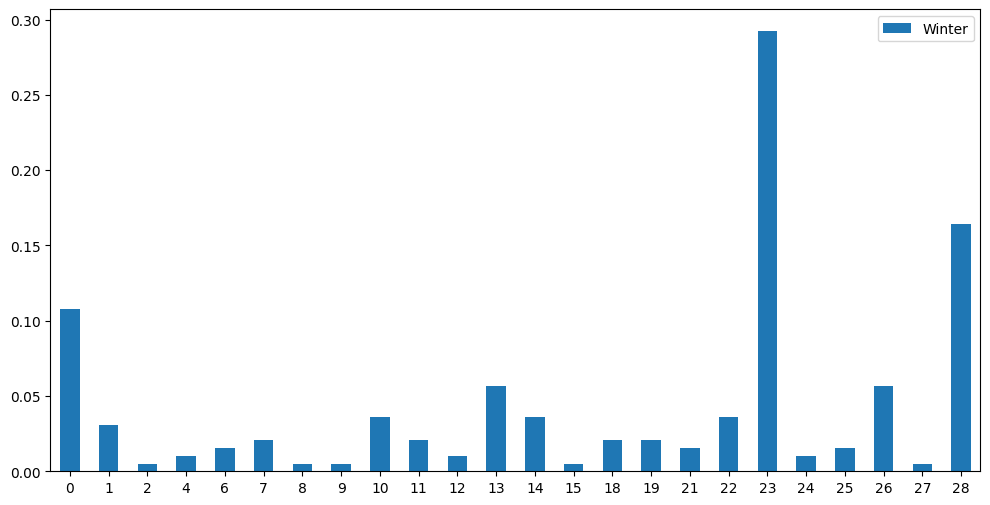

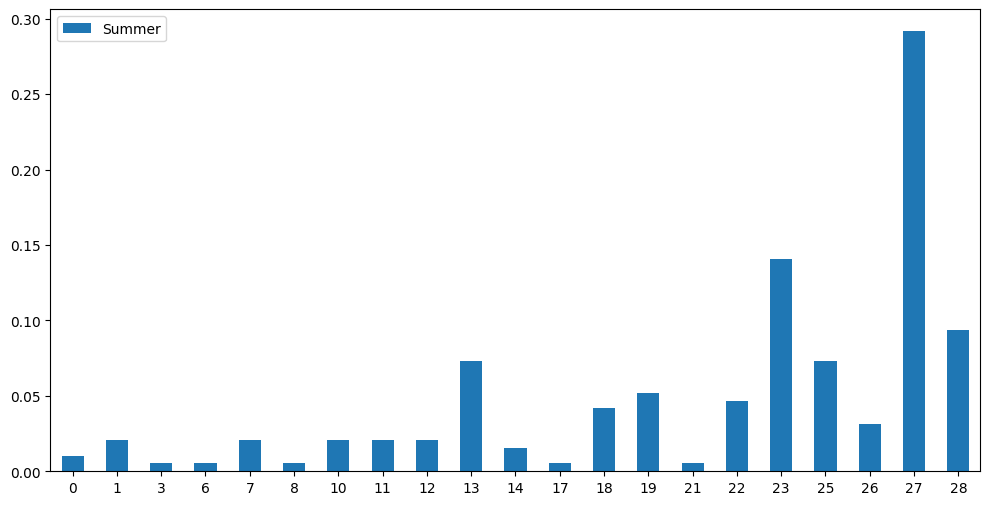

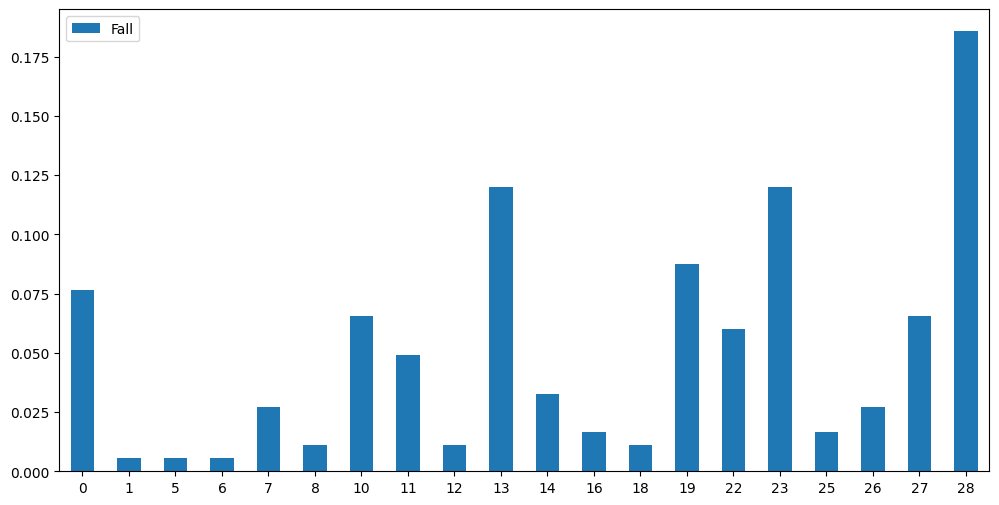

In [14]:
condtional_probability('Seasons')

- From the preceding computations, we can see that the probability of having an 
absence of more than 40 hours for employees with a high school education degree 
is 2.29%, which is approximately three times greater than the same probability for 
employees with a university degree (0.78%).

High School     0.909091
Graduate        0.045455
Postgraduate    0.045455
Name: Education, dtype: float64


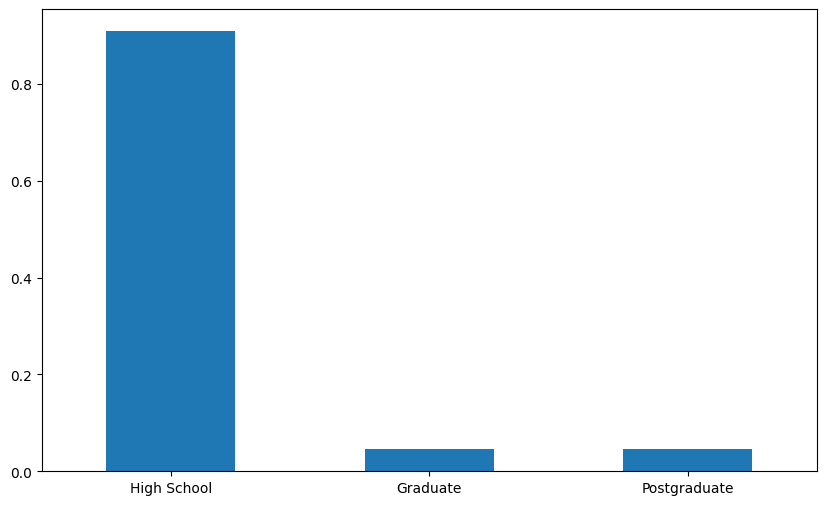

In [15]:
#define function to calculate interquartile range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

#calculate IQR for 'rating' and 'points' columns
q1, q3 = np.quantile(preprocessed_data['Absenteeism time in hours'], [.25, .75])
iqr = q3 - q1

lower_threshold = q1 - 1.5*iqr
upper_threshold = q3 + 1.5*iqr

mask = (preprocessed_data['Absenteeism time in hours'] < lower_threshold) |\
        (preprocessed_data['Absenteeism time in hours'] > upper_threshold)

plot_data = preprocessed_data.loc[mask].Education.value_counts(normalize=True)
print(plot_data)
plot_data.plot(kind='bar', figsize=(10, 6), rot=0)
plt.savefig('figs/Extreme values in each educational grade.png', format='png')

In [16]:
"""
define threshold for extreme hours of absenteeism and get total number 
of entries
"""
threshold = 40
total_entries = len(preprocessed_data)

# find entries with Education == high_school
high_school_mask = preprocessed_data["Education"] == "High School"

# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data["Absenteeism time in hours"] > threshold

# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask]) / total_entries

# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) / total_entries

"""
compute probability of having high school and being absent for more 
than "threshold" hours
"""
prob_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask])/total_entries
"""
compute probability of having more than high school and being absent 
for more than "threshold" hours
"""
prob_extreme_graduate = len(preprocessed_data[~high_school_mask & extreme_mask])/total_entries

# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school

cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate

print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}")
preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554
